<a href="https://colab.research.google.com/github/aditijain-11/Breast-Cancer-Predicition/blob/main/CNN_for_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/',)


ModuleNotFoundError: No module named 'google.colab'

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp,tanh
from tokenize import Exponent
from enum import Enum
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

C:\Users\hp\AppData\Local\Temp\ipykernel_26076\1561456619.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [3]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [4]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32


In [5]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
263,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443,...,17.91,31.67,115.90,988.6,0.1084,0.1807,0.22600,0.08568,0.2683,0.06829
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
55,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,...,12.84,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036
34,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.52740,0.18640,0.4270,0.12330


In [6]:
y_train.head()

263    0
9      0
3      0
55     1
34     0
dtype: int32

In [7]:
# utility function that will export a plot to a base-64 encoded string that the model card will accept

def plot_to_str():
  img = BytesIO()
  plt.savefig(img, format='png')
  return base64.encodebytes(img.getvalue()).decode('utf-8')

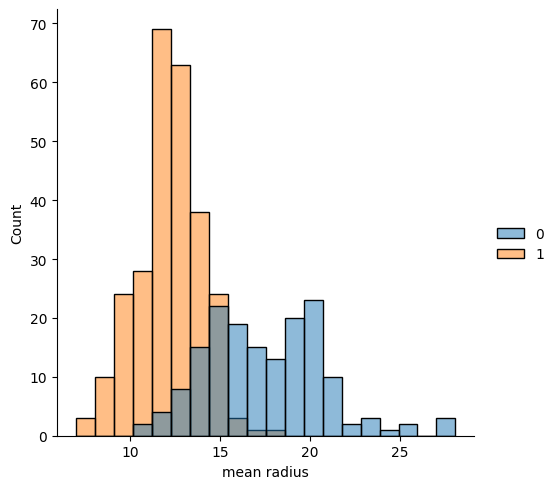

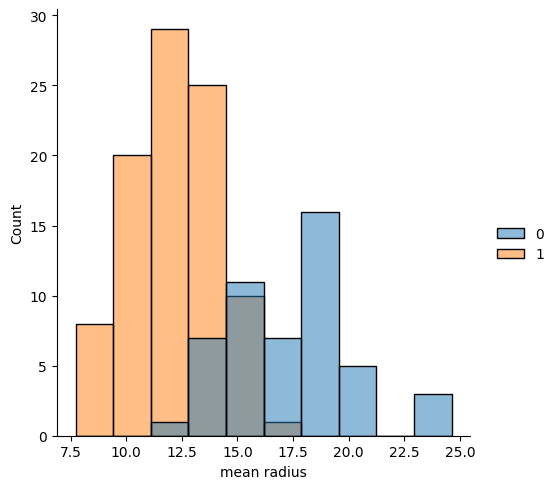

In [8]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x = X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x = X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

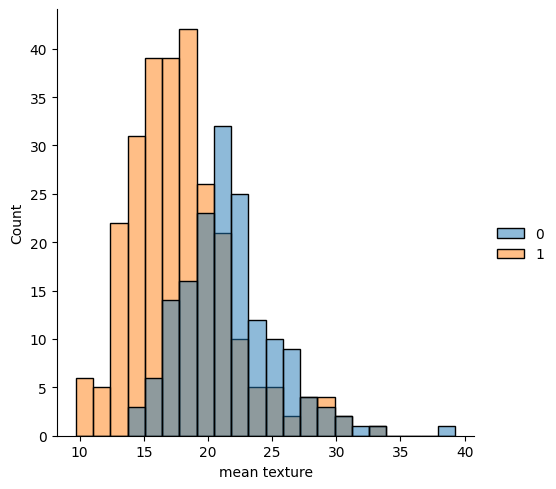

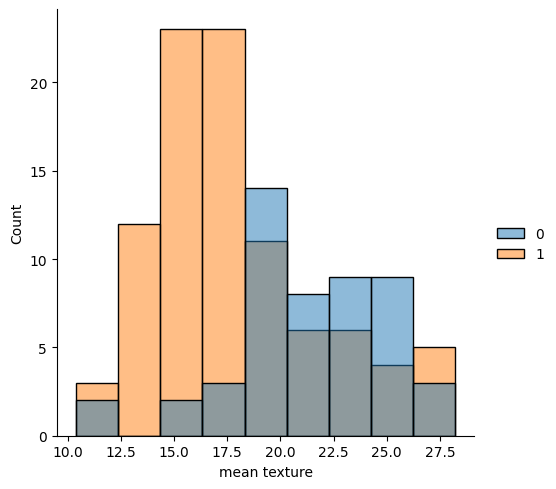

In [9]:
# plot mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x = X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

In [10]:
# create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

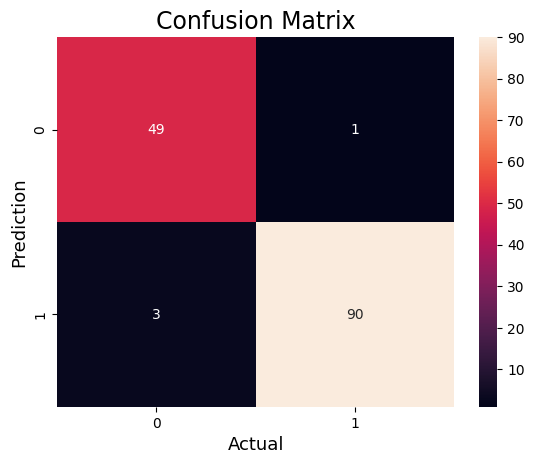

In [11]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
file_name = "/content/drive/MyDrive/Colab Notebooks/FNA"

In [13]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/FNA"

In [14]:
print(DATADIR)

/content/drive/MyDrive/Colab Notebooks/FNA


In [15]:
CATEGORIES = ['benign', 'malignant']

In [16]:
import pathlib
data_dir = pathlib.Path(DATADIR)

In [17]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

0


In [18]:
benign = list(data_dir.glob('benign/*'))
PIL.Image.open(str(benign[0]))

IndexError: list index out of range

In [19]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))

IndexError: list index out of range

In [20]:
batch_size=32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

NotFoundError: Could not find directory \content\drive\MyDrive\Colab Notebooks\FNA

In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height,img_width),
    batch_size= batch_size
)

NotFoundError: Could not find directory \content\drive\MyDrive\Colab Notebooks\FNA

In [ ]:
class_name = train_ds.class_names
print(class_name)

['benign', 'malignant']


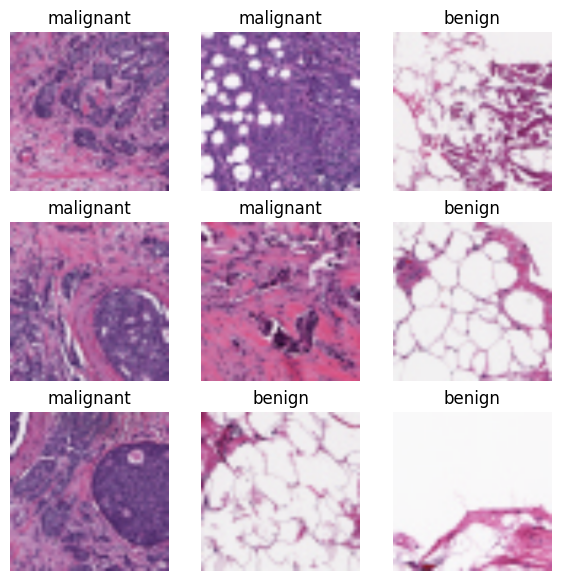

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.10795193 0.9992376


In [ ]:
num_classes = len(class_name)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
44/44 [==============================] - 66s 1s/step - loss: 0.6312 - accuracy: 0.7345 - val_loss: 0.5991 - val_accuracy: 0.7435
Epoch 2/10
44/44 [==============================] - 58s 1s/step - loss: 0.3700 - accuracy: 0.8504 - val_loss: 0.3773 - val_accuracy: 0.8617
Epoch 3/10
44/44 [==============================] - 59s 1s/step - loss: 0.3136 - accuracy: 0.8806 - val_loss: 0.2812 - val_accuracy: 0.9222
Epoch 4/10
44/44 [==============================] - 58s 1s/step - loss: 0.2603 - accuracy: 0.9086 - val_loss: 0.2678 - val_accuracy: 0.9251
Epoch 5/10
44/44 [==============================] - 56s 1s/step - loss: 0.2692 - accuracy: 0.9058 - val_loss: 0.2936 - val_accuracy: 0.8934
Epoch 6/10
44/44 [==============================] - 58s 1s/step - loss: 0.2451 - accuracy: 0.9137 - val_loss: 0.3156 - val_accuracy: 0.8934
Epoch 7/10
44/44 [==============================] - 61s 1s/step - loss: 0.2353 - accuracy: 0.9158 - val_loss: 0.2520 - val_accuracy: 0.9251
Epoch 8/10
44/44 [==

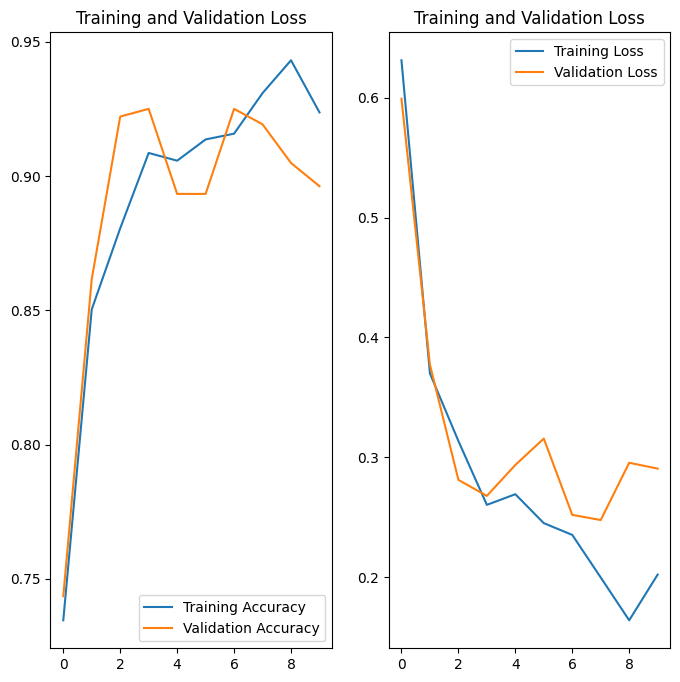

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

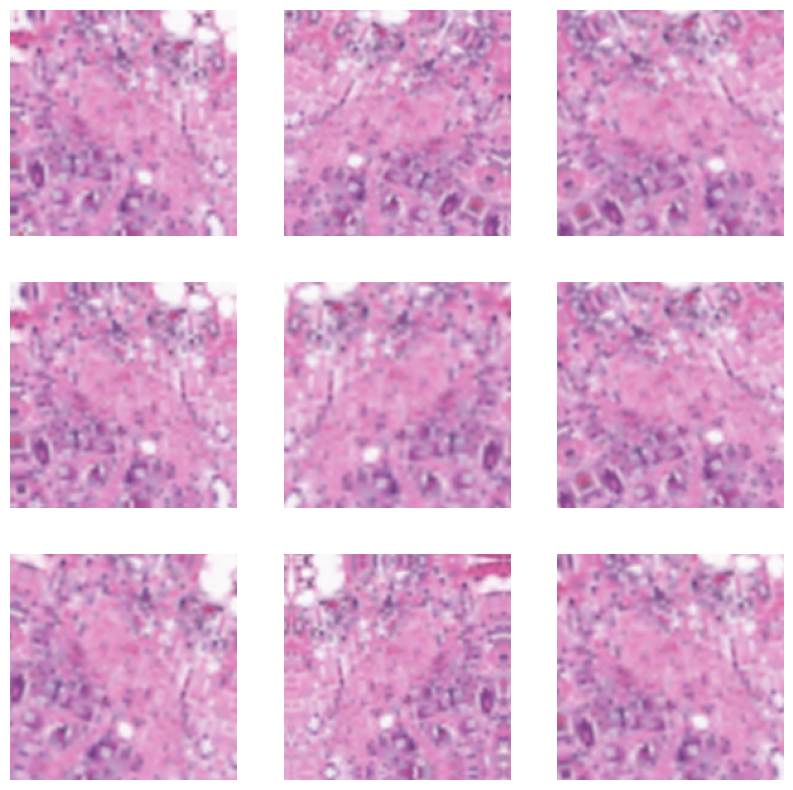

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
epochs = 15
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
44/44 [==============================] - 87s 2s/step - loss: 0.2216 - accuracy: 0.9144 - val_loss: 0.2115 - val_accuracy: 0.9280
Epoch 2/15
44/44 [==============================] - 63s 1s/step - loss: 0.2067 - accuracy: 0.9252 - val_loss: 0.2098 - val_accuracy: 0.9366
Epoch 3/15
44/44 [==============================] - 63s 1s/step - loss: 0.2113 - accuracy: 0.9223 - val_loss: 0.2340 - val_accuracy: 0.9280
Epoch 4/15
44/44 [==============================] - 67s 2s/step - loss: 0.1998 - accuracy: 0.9252 - val_loss: 0.2119 - val_accuracy: 0.9107
Epoch 5/15
44/44 [==============================] - 66s 2s/step - loss: 0.1878 - accuracy: 0.9309 - val_loss: 0.2106 - val_accuracy: 0.9193
Epoch 6/15
44/44 [==============================] - 63s 1s/step - loss: 0.1955 - accuracy: 0.9309 - val_loss: 0.1828 - val_accuracy: 0.9337
Epoch 7/15
44/44 [==============================] - 64s 1s/step - loss: 0.1780 - accuracy: 0.9273 - val_loss: 0.1690 - val_accuracy: 0.9366
Epoch 8/15
44/44 [==

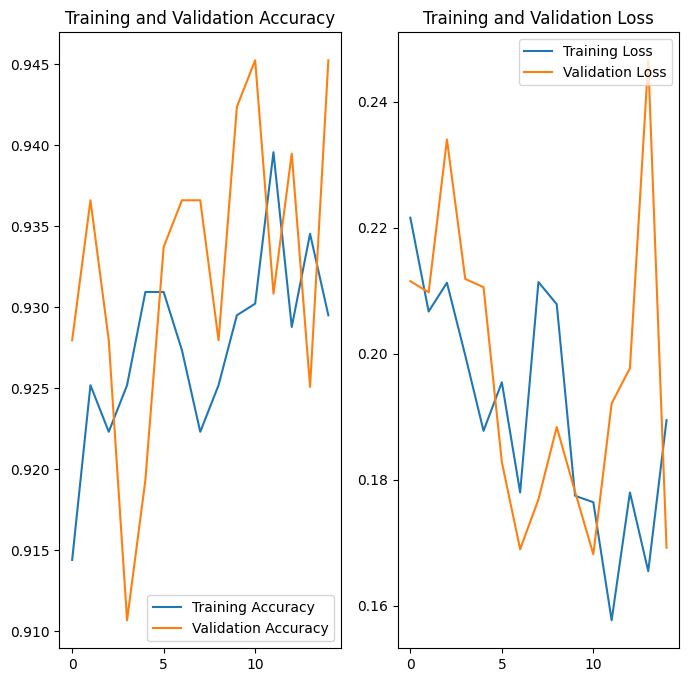

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
DATADIR="/content/drive/MyDrive/Colab Notebooks/FNA/benign/10253_idx5_x1401_y1051_class0.png"

In [ ]:
data_dir = pathlib.Path(DATADIR)

In [ ]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 98ms/step
This image most likely belongs to benign with a 96.77 percent confidence.
